#### Task 3P: Working with numpy Matrices (Multidimensional Data)
#### Name: Prateek Singh
#### Student number: 221218743
#### Email: singhprate@deakin.edu.au
#### Unit: SIT731

This task is about exploring and analyzing the body mass indices of adult males and females based on two datasets from the National Health and Nutrition Examination Survey (NHANES) from 2020.
This task also allows us to explore the relationships between different variables and how they can be identified using correlation coefficeints. This is a good example for real world multidimensional data analysis, as one of the major resposibilities of a data scientist/analyst is to explore the hidden relationship and perform multvariate analysis.

In [1]:
#Neccessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### 1 - From https://github.com/gagolews/teaching-data/tree/master/marek, download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset): <br>• nhanes_adult_male_bmx_2020.csv, <br>• nhanes_adult_female_bmx_2020.csv. <br>They give body measurements of adult males and females. <br> 2 - Read the two files as numpy matrices named male and female.

In [2]:
male = pd.read_csv("3P_Data/nhanes_adult_male_bmx_2020.csv",
    comment="#")
male = male.to_numpy()

female = pd.read_csv("3P_Data/nhanes_adult_female_bmx_2020.csv",
    comment="#")
female = female.to_numpy()

#### 3. On a single plot (use matplotlib.pyplot.subplot), draw two histograms: for female weights (top subfigure) and for male weights (bottom subfigure). Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

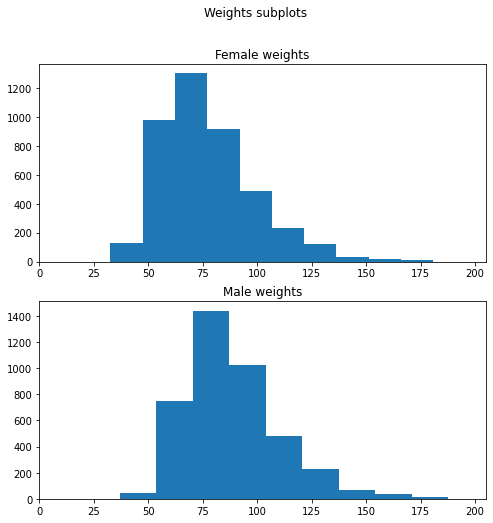

In [3]:
female_weights = female[:, 0]
male_weights = male[:, 0]

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))
fig.suptitle('Weights subplots')

#take the max of both the weights numpy array and 
#use it to set upper limit for x axis for both subplots
x_lim = np.ceil(max(np.amax(female_weights),np.amax(male_weights)))

ax1.set_title('Female weights')
ax1.set_xlim((0, x_lim))
ax2.set_title('Male weights')
ax2.set_xlim((0, x_lim))

ax1.hist(female_weights)
ax2.hist(male_weights)
plt.show()

#### 4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other. Note that the boxplot function can be fed with a list of two vectors like [female_weights, male_weights]. In your own words, discuss the results.

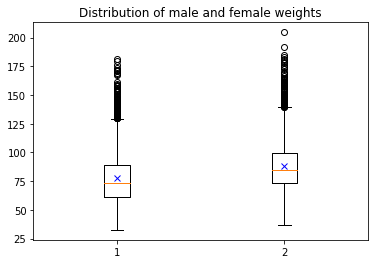

In [4]:
blue_cross = dict(marker='x', markeredgecolor='blue')
_boxplot = plt.boxplot([female_weights, male_weights],
                       meanprops=blue_cross, 
                       showmeans=True)
                       #widths=(0.2, 0.2))
plt.title("Distribution of male and female weights")
plt.show()

In [5]:
#Just printing out the mean value to highlight the difference observed via boxplots
print(np.mean(male_weights))
print(np.mean(female_weights))

88.36454300416565
77.40379057095475


In the resulting plot, each box represents the distribution of the female weights and male weights. The top and bottom of each box represent the 75th and 25th percentiles of the data, respectively. The line in the middle of each box represents the median and the blue cross represents the mean. The whiskers extend from the top and bottom of the box to the minimum and maximum values, excluding outliers. Outliers are plotted as individual points outside the whiskers.

Using the boxplot, we can observe mean, median and IQR of a given data distibution. In this plot, as the mean and median do not overlap we can observe the skewness present in the data. As the mean is greater than the median, we can say the data is right skewed and does not follow uniform distribution.

#### 5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth).

In [16]:
def GetNumericalAggregates(array):
    _mean = np.mean(array)
    _median = np.median(array)
    _min = np.min(array)
    _max = np.max(array)
    _sd = np.std(array)
    _q1 = np.quantile(array, 0.25)
    _q3 = np.quantile(array, 0.75)
    _iqr = _q3 - _q1
    d = {"mean": _mean,
         "median": _median,
         "min": _min,
         "max": _max,
         "std": _sd,
         "q1": _q1,
         "q3": _q3,
         "iqr": _iqr,
         "shape": array.shape
        }
    return d

#Helper function to format dict
#could have used json but just to prevent additional lib used a custom fucntion
def FormatDict(_dict):
    return str("\n".join("{}:\t{}".format(k, v) for k, v in _dict.items()))
    
female_aggr = GetNumericalAggregates(female_weights)
male_aggr = GetNumericalAggregates(male_weights)

print ("basic numerical aggregates of female weights:")
print(FormatDict(female_aggr))
print ("\nbasic numerical aggregates of male weights:")
print(FormatDict(male_aggr))


basic numerical aggregates of female weights:
mean:	77.40379057095475
median:	73.6
min:	32.6
max:	180.9
std:	21.54250829019315
q1:	61.6
q3:	88.7
iqr:	27.1
shape:	(4221,)

basic numerical aggregates of male weights:
mean:	88.36454300416565
median:	85.0
min:	36.8
max:	204.6
std:	21.418936717962495
q1:	73.3
q3:	99.8
iqr:	26.5
shape:	(4081,)


The above numerical aggregates also reflect similar observations as the boxplot. Although, the numerical values help in identifying the exact differnce between two categories, whereas the visual info helps gauge the differences from a birds eye view quickly.
<br> Here, we can see that male weights are higher in mean, median, min, max. The dispersion is similar as observed through the standard deviation. The number of records in male weights are higher than that of female weights.
<br> The mean and median values also suggest that both the subsets (female and male weights data) are skewed; right skewed as the mean is greater than the median and do not follow uniform distribution.

#### 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants

In [7]:
def get_bmi(wt, h):
    h = h/100 #cm to metres
    if wt > 1000 or wt < 1:
        raise Exception("Invalid Weight")
    if h > 250 or h < 1:
        raise Exception("Invalid Height")
    bmi = wt / (h*h)
    return bmi

calc_bmi = np.vectorize(get_bmi)
female_bmi = calc_bmi(female[:, 0], female[:, 1])
female = np.column_stack([female, female_bmi])

In [8]:
female.shape #check if the column stack worked fine

(4221, 8)

#### 7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).

In [9]:
##As zscore is [x - mean(x)]/std(x), hence I use np.mean and np.std on the entire matrix 
#to create new matrix, this matrix has its column standardised
zfemale = (female-np.mean(female))/np.std(female)

#### 8. Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale). Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables. Interpret the obtained results.

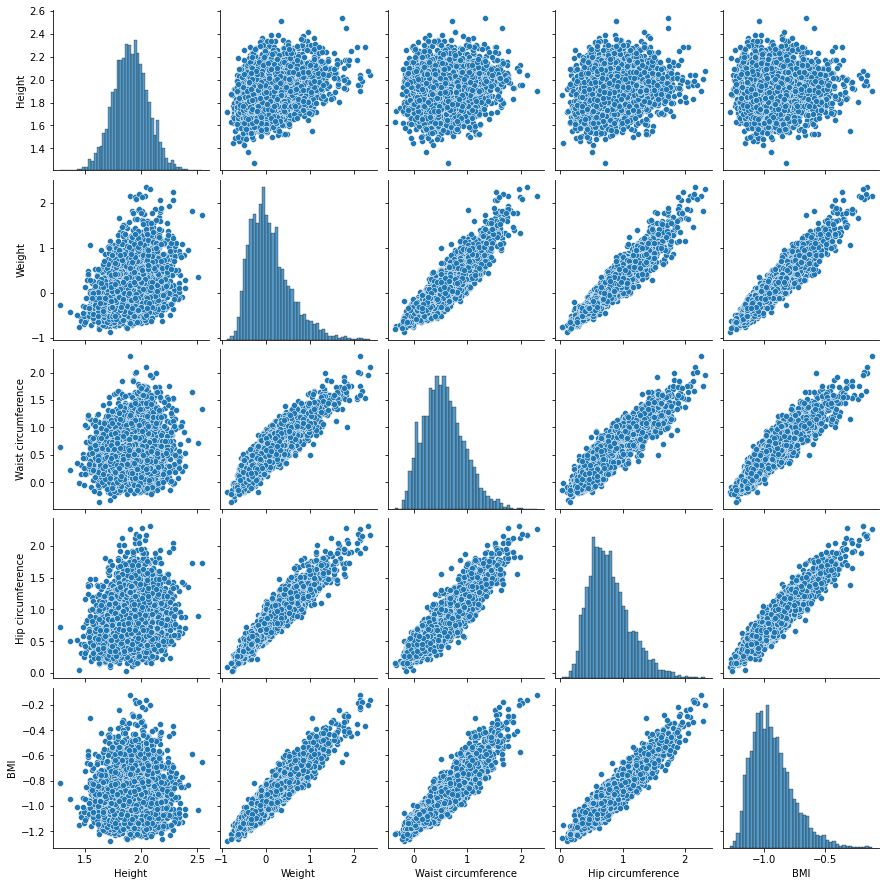

In [11]:
df = pd.DataFrame(zfemale, columns=["Weight", "Height", "Upper arm length", 
                                    "Upper leg length", "Arm circumference", 
                                    "Hip circumference", "Waist circumference", 
                                    "BMI"])

sns.pairplot(df[["Height", "Weight", "Waist circumference", "Hip circumference", "BMI"]])
plt.show()

In [12]:
pearson_corr = df.corr(method="pearson")
spearman_corr = df.corr(method="spearman")

print ("The pearson correlation coefficient is:\n", pearson_corr)
print ("The spearman correlation coefficient is:\n", spearman_corr)

The pearson correlation coefficient is:
                        Weight    Height  Upper arm length  Upper leg length  \
Weight               1.000000  0.345496          0.551563          0.193186   
Height               0.345496  1.000000          0.667911          0.657202   
Upper arm length     0.551563  0.667911          1.000000          0.475645   
Upper leg length     0.193186  0.657202          0.475645          1.000000   
Arm circumference    0.905385  0.151955          0.453122          0.079876   
Hip circumference    0.946553  0.202895          0.459400          0.100268   
Waist circumference  0.904550  0.126547          0.427893         -0.034803   
BMI                  0.945900  0.033077          0.364660         -0.014819   

                     Arm circumference  Hip circumference  \
Weight                        0.905385           0.946553   
Height                        0.151955           0.202895   
Upper arm length              0.453122           0.459400   
Upp

The Pearson's correlation measures the linear relationship between two variables, while the Spearman's correlation measures the monotonic relationship between two variables. Monotonic means that the variables either increase or decrease together, but not necessarily linearly.

The correlation coefficients are interpreted as follows:
<ul>
   <li> A value of 1 indicates a perfect positive linear relationship between two variables.
   <li> A value of -1 indicates a perfect negative linear relationship between two variables.
   <li> A value of 0 indicates no linear relationship between two variables.
</ul>
For example, if the Pearson's correlation between BMI and weight is 0.8, it indicates that there is a strong positive linear relationship between BMI and weight. If the Spearman's correlation between the same two variables is 0.9, it indicates that there is an even stronger monotonic relationship between BMI and weight, even if the relationship is not necessarily linear. Using this, we can identify that BMI has high positive relationship all the variables except Height, Upper arm length and Upper leg length.

#### 2 Additional Tasks for Postgraduate (SIT731) Students (*)

#### 1. Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

In [13]:
female_waist2ht = np.divide(female[:, 6], female[:, 1])
female_waist2hip = np.divide(female[:, 6], female[:, 5])
female = np.column_stack([female, female_waist2ht, female_waist2hip])

male_waist2ht = np.divide(male[:, 6], male[:, 1])
male_waist2hip = np.divide(male[:, 6], male[:, 5])
male = np.column_stack([male, male_waist2ht, male_waist2hip])

#### 2. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waistto-height ratio and the waist-to-hip ratio of both male and female participants. Explain what yousee.

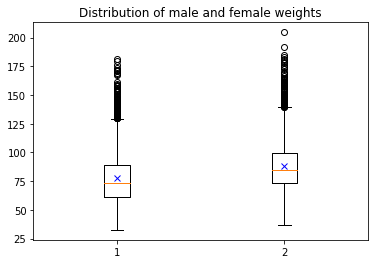

In [14]:
blue_cross = dict(marker='x', markeredgecolor='blue')
_boxplot = plt.boxplot([female_weights, male_weights],
                       meanprops=blue_cross, 
                       showmeans=True)
                       #widths=(0.2, 0.2))
plt.title("Distribution of male and female weights")
plt.show()

In the resulting plot, each box represents the distribution of the waist-to-height ratio and the waist-to-hip ratio for one group (male or female). The top and bottom of each box represent the 75th and 25th percentiles of the data, respectively. The line in the middle of each box represents the median and the blue cross represents the mean. The whiskers extend from the top and bottom of the box to the minimum and maximum values, excluding outliers. Outliers are plotted as individual points outside the whiskers.

Using the boxplot, we can observe mean, median and IQR of a given data distibution. In this plot, as the mean and median do not overlap we can observe the skewness present in the data. As the mean is greater than the median, we can say the data is right skewed and does not follow uniform distribution.

#### 3. In your own words, list some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.

#### Advantages of BMI:
<ul>
<li>Easy to calculate: BMI is calculated by dividing the weight in kilograms by the height in meters squared, making it a simple and straightforward measurement to obtain.
<li>Widely used: BMI is widely used and accepted as a standard indicator of overall body weight and obesity levels.
<li>Low cost: Calculating BMI does not require any special equipment or resources, making it a low-cost method for assessing body weight.
</ul>

#### Disadvantages of BMI:
<ul>
<li> Does not differentiate between fat and muscle: BMI does not distinguish between fat mass and muscle mass, so it can give an incorrect result for athletes or highly muscled individuals.
<li> Does not account for age, gender, and body shape: BMI does not take into account factors such as age, gender, and body shape, which can impact body composition and lead to incorrect results.
<li> Does not account for body composition: BMI does not measure body composition, so it cannot differentiate between body fat and lean tissue mass.
</ul>

#### Advantages of waist-to-height ratio:
<ul>
<li> Easy to calculate: Waist-to-height ratio is calculated by dividing the waist circumference by the height, making it a simple and straightforward measurement to obtain.
<li> Considers body shape: Waist-to-height ratio takes into account body shape, which can be a better indicator of health than overall body weight.
<li> Better indicator of health risks: Waist-to-height ratio has been shown to be a better indicator of health risks such as cardiovascular disease, type 2 diabetes, and metabolic syndrome than BMI.
</ul>

#### Disadvantages of waist-to-height ratio:
<ul>
<li> Less widely used: Waist-to-height ratio is not as widely used or accepted as BMI, so it may not be as well understood by healthcare providers and the general public.
<li> Does not account for muscle mass: Similar to BMI, Waist-to-height ratio does not take into account muscle mass, so it may give incorrect results for athletes or highly muscled individuals.
<li> Does not account for differences in body composition between populations
</ul>

#### Advantages of waist-to-hip ratio:
<ul>
<li> Indicator of abdominal obesity: Waist-to-hip ratio is an indicator of abdominal obesity, which has been shown to be a risk factor for health problems such as cardiovascular disease, type 2 diabetes, and metabolic syndrome.
<li> Considers body shape: Waist-to-hip ratio takes into account body shape, which can be a better indicator of health than overall body weight.
</ul>

#### Disadvantages of waist-to-hip ratio:
<ul>
<li> Requires measurement of two body circumferences: Waist-to-hip ratio requires measurement of both waist and hip circumferences, making it a more complex measurement to obtain than BMI or waist-to-height ratio.
<li> Does not account for overall body weight: Waist-to-hip ratio does not take into account overall body weight, so it may not be as useful for assessing overall health and obesity levels as other methods.
</ul>

#### Optional: 
#### Print out the standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI (e.g., call print for a subset of zfemale comprised of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

In [15]:
sorted_indices = np.argsort(zfemale[:, 7])
labels = ["weight (kg)", "standing height (cm)", "upper arm length (cm)",
          "upper leg length (cm)", "arm circumference (cm)", "hip circumference (cm)", 
          "waist circumference (cm)", "BMI"]

# Get the 5 persons with the lowest BMIs
lowest_BMIs = zfemale[sorted_indices[:5], :]

# Get the 5 persons with the highest BMIs
highest_BMIs = zfemale[sorted_indices[-5:], :]

# Here I am creating a dictionary for pretty printing, this is not really required
lowest_BMIs_dict = [{labels[i]: lowest_BMIs[j][i] for i in range(len(labels))} for j in range(len(lowest_BMIs))]
highest_BMIs_dict = [{labels[i]: highest_BMIs[j][i] for i in range(len(labels))} for j in range(len(highest_BMIs))]

print("Persons with Lowest BMIs:")
for i, d in enumerate(lowest_BMIs_dict):
    print(f"Person {i + 1}:")
    print(FormatDict(d))
    print("\n")

print("_______________________________________")

print("\nPersons with Highest BMIs:")
for i, d in enumerate(highest_BMIs_dict):
    print(f"Person {i + 1}:")
    print(FormatDict(d))
    print("\n")


Persons with Lowest BMIs:
Person 1:
weight (kg):	-0.8726238472798361
standing height (cm):	1.7179332057869394
upper arm length (cm):	-0.8769813864775936
upper leg length (cm):	-0.8551936904888066
arm circumference (cm):	-1.1384337383430378
hip circumference (cm):	0.10128616341894317
waist circumference (cm):	-0.17323880603977304
BMI:	-1.2734433635837712


Person 2:
weight (kg):	-0.7789367545280521
standing height (cm):	1.876983386505085
upper arm length (cm):	-0.8856964648731084
upper leg length (cm):	-0.7462552105448715
arm circumference (cm):	-1.1689365127273394
hip circumference (cm):	0.16447048178642562
waist circumference (cm):	-0.21681419801734708
BMI:	-1.2640892558492292


Person 3:
weight (kg):	-0.6177078042110282
standing height (cm):	2.1841898999469818
upper arm length (cm):	-0.7658641369347798
upper leg length (cm):	-0.7331825929515993
arm circumference (cm):	-1.1471488167385526
hip circumference (cm):	0.2254760305550292
waist circumference (cm):	-0.08390925248574643
BMI:	-1

The result shows the standardised body measurements for the 5 persons with the lowest BMIs and the 5 persons with the highest BMIs. We can see how these 10 individuals differ from the rest of the population in terms of standardised body measurements. 
<br> Eg: if a person with a low BMI has a low standardised weight it could indicate that they have a lower weight compared to the rest of the population which could be contributing to their low BMI. 
<br> Similarly, if a person with a high BMI has a high standardised weight, it could indicate that they have a higher weight compared to the rest of the population, which might contribute to high BMI.